In [1]:
!pip install mne scipy scikit-learn matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 21.2 MB/s eta 0:00:00


In [2]:
from google.colab import files
files.upload()


Saving kaggle .json to kaggle .json


{'kaggle .json': b'{"username":"ananya3029","key":"e8cf8464fb7c8eb2a0d82d346b15ecc1"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp "kaggle .json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d birdy654/eeg-brainwave-dataset-feeling-emotions


Dataset URL: https://www.kaggle.com/datasets/birdy654/eeg-brainwave-dataset-feeling-emotions
License(s): copyright-authors
  0% 0.00/11.9M [00:00<?, ?B/s]
100% 11.9M/11.9M [00:00<00:00, 968MB/s]


In [5]:
import zipfile

with zipfile.ZipFile("eeg-brainwave-dataset-feeling-emotions.zip", 'r') as zip_ref:
    zip_ref.extractall("eeg_data")


In [6]:
import os

os.listdir("eeg_data")


['emotions.csv']

In [7]:
import pandas as pd
df = pd.read_csv("eeg_data/emotions.csv")  # Replace with the actual file name
df.head()


,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [8]:
df.columns[-10:]  # Last 10 columns
df.columns[:10]   # First 10 columns


Index(['# mean_0_a', 'mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a',
       'mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a'],
      dtype='object')

In [9]:
# Example if the column is called 'label'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])  # replace 'label' with actual column name

X = df.drop(['label', 'label_encoded'], axis=1)
y = df['label_encoded']


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize EEG features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [12]:
y_pred = model.predict(X_test)


              precision    recall  f1-score   support

    NEGATIVE       0.97      0.99      0.98       143
     NEUTRAL       1.00      1.00      1.00       148
    POSITIVE       0.99      0.97      0.98       136

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427



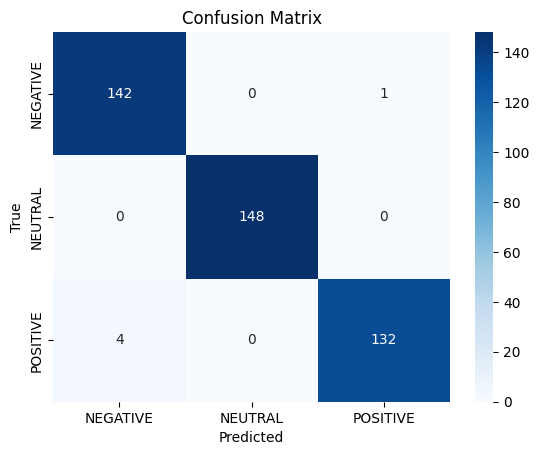

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print evaluation report
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [14]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
print("SVM Accuracy:", svm.score(X_test, y_test))

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
print("Logistic Regression Accuracy:", logreg.score(X_test, y_test))


SVM Accuracy: 0.9578454332552693
Logistic Regression Accuracy: 0.9742388758782201
